In [ ]:
# 한글 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 라이브러리 불러오기
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False



In [ ]:
# 산불 데이터 로드(필수는 아님)
fire = pd.read_csv('/content/drive/MyDrive/Weather/forestfire.csv', index_col=0)
fire = fire.sort_values(by=['startyear', 'startmonth', 'startday'])
fire

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear
15231,0.70,1,1,16:30:00,2003,기타,산38-1,부제,경산,용성,경북,1,수요일,1,15:40:00,2003
15232,0.30,8,1,13:45:00,2003,입산자실화,산214-4,둔기,울주,삼동,울산,8,수요일,1,13:00:00,2003
15233,0.02,9,1,13:45:00,2003,입산자실화,산32,반송,달성,옥포,대구,9,목요일,1,13:15:00,2003
15234,0.30,11,1,16:47:00,2003,입산자실화,산170,마령,안동,임동,경북,11,토요일,1,15:40:00,2003
15230,0.70,12,1,16:20:00,2003,입산자실화,산11,장전,합천,쌍백,경남,12,일요일,1,15:30:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,0.50,31,3,16:48:00,2023,담뱃불실화,산114-2,대치,순천,황전,전남,31,금요일,3,12:29:00,2023
5661,0.27,31,3,13:30:00,2023,기타,26.0,호명,경주,강동,경북,31,금요일,3,12:10:00,2023
5662,0.10,31,3,12:30:00,2023,기타,산28-1,청계,순창,팔덕,전북,31,금요일,3,11:39:00,2023
5663,0.01,31,3,10:39:00,2023,기타,산250,운곡,부강,NaN,세종,31,금요일,3,09:50:00,2023


In [ ]:
# 날씨 데이터 불러오기
weather = pd.read_csv("/content/drive/MyDrive/Weather/weather.csv", index_col=0)
weather

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),fire
0,90,속초,2013-01-01,-2.0,0.0,2.5,52.3,0
1,90,속초,2013-01-02,-7.0,0.0,3.9,28.1,0
2,90,속초,2013-01-03,-7.6,0.0,2.4,30.4,0
3,90,속초,2013-01-04,-5.2,0.0,2.2,36.3,0
4,90,속초,2013-01-05,-1.8,0.0,2.3,37.0,0
...,...,...,...,...,...,...,...,...
29211,184,제주,2022-12-27,6.5,0.0,3.5,65.8,0
29212,184,제주,2022-12-28,6.8,0.0,3.8,63.9,0
29213,184,제주,2022-12-29,6.0,0.0,4.0,63.9,0
29214,184,제주,2022-12-30,7.0,0.0,3.7,55.1,0


밑의 분석, 전처리파트는 건너뛰어도 됩니다

# 산불데이터 분석

날짜 범위: 2003/01/01 ~ 2023/03/31 <br>
날짜 수: 7395일 <br>
화재 건수: 15327

## 연도별, 지역별 산불 분포

<Axes: title={'center': '연도별 산불 분포'}>

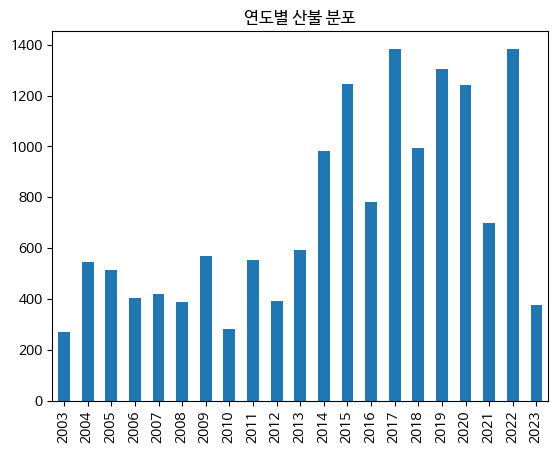

In [ ]:
# 연도별 산불 분포
fireyear = fire.value_counts(fire["startyear"].values)
fireyear = fireyear.sort_index()

fireyear.plot.bar(title="연도별 산불 분포")


<Axes: title={'center': '시도별 산불 횟수'}>

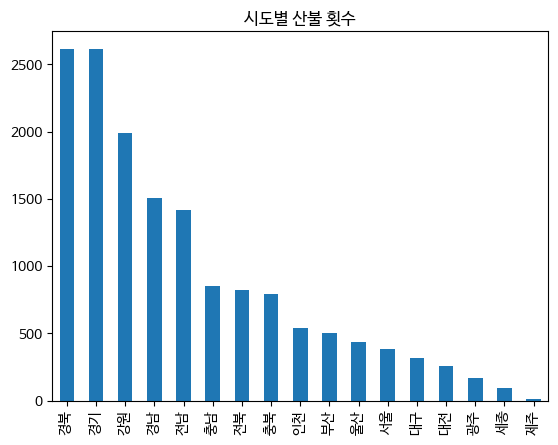

In [ ]:
firesido = fire["locsi"].value_counts()
firesido.plot.bar( title="시도별 산불 횟수")

In [ ]:
print("각 시도별 평균 산불 횟수:", firesido.mean())
print("각 시도별 평균 산불 횟수/전체 날짜:", firesido.mean()/7395*100,"%")

각 시도별 평균 산불 횟수: 901.5882352941177
각 시도별 평균 산불 횟수/전체 날짜: 12.191862546235534 %


<Axes: title={'center': '군구별 산불 횟수'}>

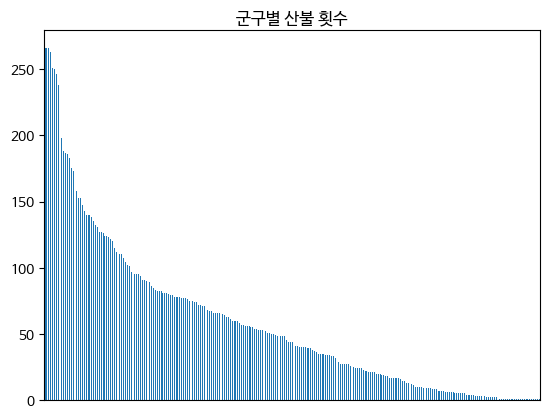

In [ ]:
firegungu = fire["locgungu"].value_counts()
firegungu.plot.bar(xticks=[], title="군구별 산불 횟수")

In [ ]:
print("각 군구별 평균 산불 횟수:", firegungu.mean())
print("각 군구별 평균 산불 횟수/전체 날짜:", firegungu.mean()/7395*100,"%")

각 군구별 평균 산불 횟수: 57.76603773584905
각 군구별 평균 산불 횟수/전체 날짜: 0.7811499355760522 %


## 산불 피해 영역 통계

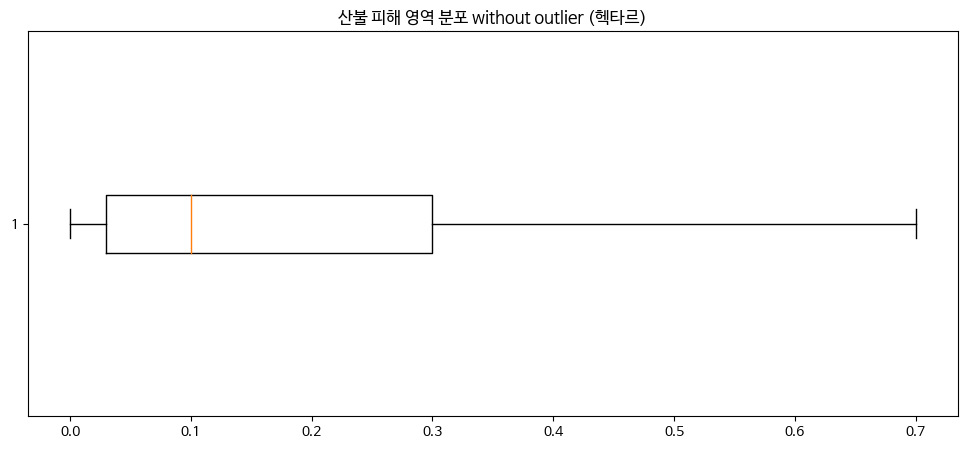

In [ ]:
plt.figure(figsize=(12,5))
plt.title("산불 피해 영역 분포 without outlier (헥타르)")
plt.boxplot(fire["damagearea"], vert=False, showfliers=False)
plt.show()

In [ ]:
damagearea = fire["damagearea"]
damageQ1 = damagearea.quantile(0.25)
damageQ3 = damagearea.quantile(0.75)
damageIQR = damageQ3 - damageQ1
outlierLimit = damageQ3 + 1.5*damageIQR
outlierNum = (damagearea > outlierLimit).sum()
print("피해영역 outlier 개수:", outlierNum)
print("피해영역 outlier 비율:", outlierNum/damagearea.size*100, "%")

피해영역 outlier 개수: 1904
피해영역 outlier 비율: 12.422522346186469 %


# 군구, 특별시별 산불 횟수 분석

In [ ]:
# 지역별 산불자료
fire[(fire["locsi"]=="제주")]

,damagearea,endday,endmonth,endtime,endyear,firecause,locbunji,locdong,locgungu,locmenu,locsi,startday,startdayofweek,startmonth,starttime,startyear
14695,1.00,19,2,08:00:00,2004,쓰레기소각,산16,사게,남제주,안덕,제주,18,수요일,2,15:43:00,2004
13027,1.00,24,2,23:55:00,2007,쓰레기소각,NaN,대서,제주,추자,제주,24,토요일,2,22:40:00,2007
12977,2.00,3,3,01:15:00,2008,쓰레기소각,NaN,북촌,제주,조천,제주,2,일요일,3,22:24:00,2008
7872,0.50,24,4,13:45:00,2012,담뱃불실화,산183-6,광령,제주,애월,제주,24,화요일,4,11:53:00,2012
14099,0.50,24,4,13:45:00,2012,담뱃불실화,산183-6,광령,제주,애월,제주,24,화요일,4,11:53:00,2012
7693,0.50,8,1,18:00:00,2013,기타,산160,대서,제주,추자,제주,8,화요일,1,14:40:00,2013
14269,0.50,8,1,17:45:00,2013,기타,산160,대서,제주,추자,제주,8,화요일,1,14:40:00,2013
7630,1.00,10,3,02:10:00,2013,쓰레기소각,85.0,NaN,제주,월평,제주,9,토요일,3,11:53:00,2013
14054,1.00,10,3,02:10:00,2013,쓰레기소각,산85,NaN,제주,월평,제주,9,토요일,3,11:53:00,2013
2887,0.82,25,4,14:55:00,2020,기타,산111,김녕,제주,구좌,제주,25,토요일,4,12:33:00,2020


In [ ]:
# 기상관측 지점이 있는곳의 리스트

# 지점중 위치가 군구로 적절한 것들. "서청주"같이 그자체로 군구가 아니면 제외. 섬들 제외
weatherLocation_gungu = ["강릉", "동해", "삼척", "속초", "영월", "원주", "인제", "정선", "철원", "춘천", "태백", "홍천",
                   "동두천", "수원", "양평", "이천", "파주",
                   "거제", "거창", "김해", "남해", "밀양", "산청", "양산", "의령", "진주", "창원", "통영", "함양", "합천",
                   "경주", "구미", "문경", "봉화", "상주", "안동", "영덕", "영주", "영천", "울진", "의성", "청송", "포항",
                   "강진", "고흥", "광양", "목포", "무안", "보성", "순천", "여수", "영광", "장흥", "진도", "해남",
                   "고창", "군산", "남원", "부안", "순창", "임실", "장수", "전주", "정읍",
                   "금산", "보령", "부여", "서산", "천안", "홍성",
                   "보은", "제천", "청주", "충주"
                   ]

#지점중 위치가 특별시로 적절한것들
weatherLocation_si = ["광주", "대구", "대전", "부산", "서울", "울산", "인천", "제주"]

<Axes: title={'center': '특별시 또는 군구별 산불 횟수'}>

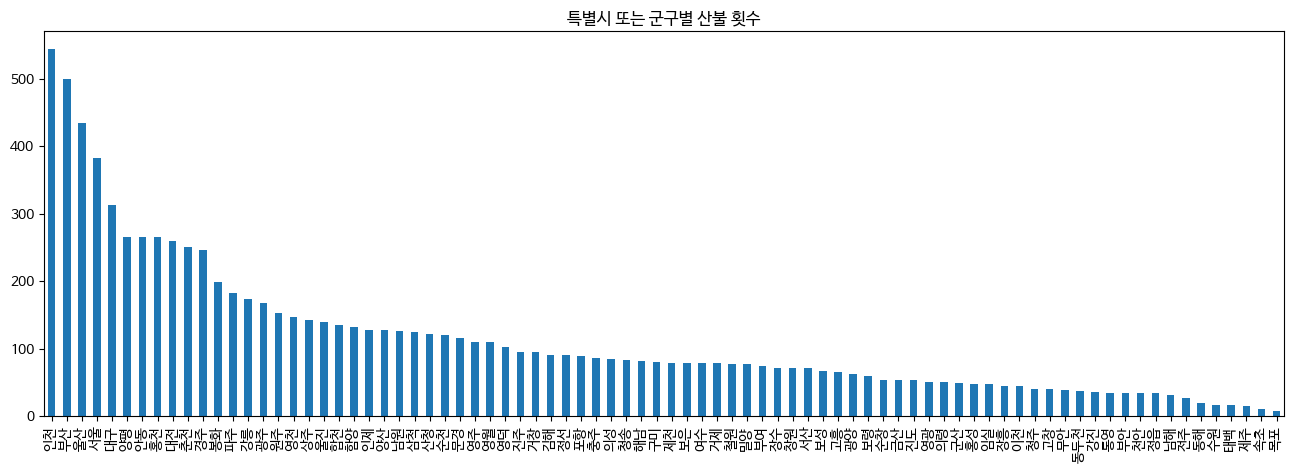

In [ ]:
locfire_dict = {}
for gungu in weatherLocation_gungu:
  count = (fire["locgungu"] == gungu).sum()
  locfire_dict[gungu] = count

for si in weatherLocation_si:
  count = (fire["locsi"] == si).sum()
  locfire_dict[si] = count

plt.figure(figsize=(16,5))
locfire_series = pd.Series(locfire_dict)
locfire_series = locfire_series.sort_values(ascending=False)

locfire_series.plot.bar(title="특별시 또는 군구별 산불 횟수")

<Axes: title={'center': '특별시 또는 군구별 산불 횟수 누적합'}>

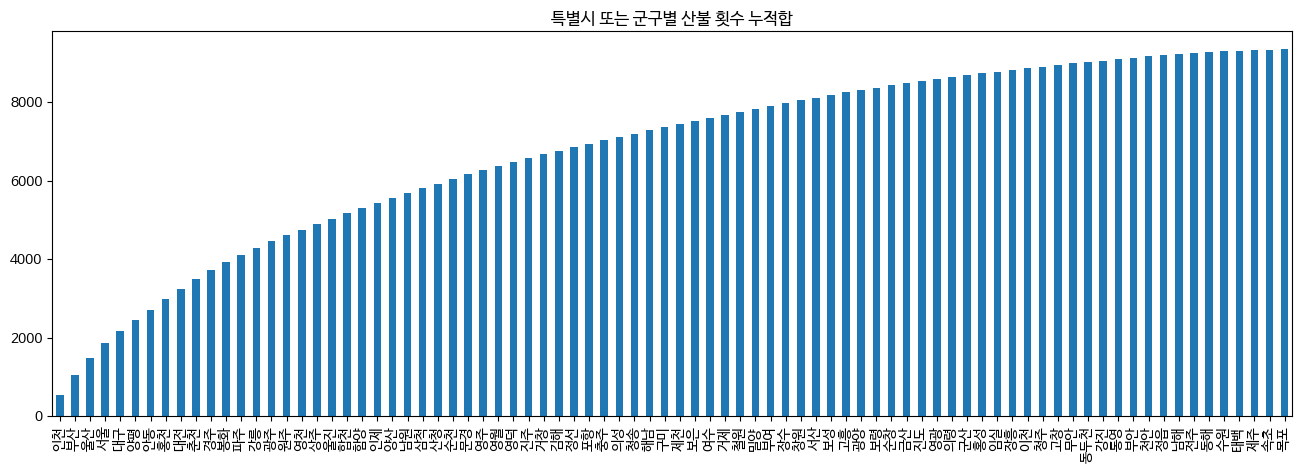

In [ ]:
plt.figure(figsize=(16,5))
locfire_series_cum = locfire_series.cumsum()
locfire_series_cum.plot.bar(title="특별시 또는 군구별 산불 횟수 누적합")

# 전처리

In [ ]:
weather_gungu = pd.read_csv('/content/drive/MyDrive/Weather/weather_gungu.csv', encoding = 'cp949')
weather_si = pd.read_csv("/content/drive/MyDrive/Weather/weather_si.csv", encoding="cp949")

In [ ]:
weather_gungu

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%)
0,90,속초,2013-01-01,-2.0,0.0,2.5,52.3
1,90,속초,2013-01-02,-7.0,0.0,3.9,28.1
2,90,속초,2013-01-03,-7.6,0.0,2.4,30.4
3,90,속초,2013-01-04,-5.2,0.0,2.2,36.3
4,90,속초,2013-01-05,-1.8,0.0,2.3,37.0
...,...,...,...,...,...,...,...
265017,295,남해,2022-12-27,1.6,0.0,1.1,55.1
265018,295,남해,2022-12-28,2.0,0.0,1.8,55.8
265019,295,남해,2022-12-29,1.3,0.0,1.3,56.4
265020,295,남해,2022-12-30,2.0,0.0,1.6,62.0


In [ ]:
weather_si

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%)
0,108,서울,2013-01-01,-4.7,3.1,3.2,73.5
1,108,서울,2013-01-02,-11.7,0.0,4.2,40.8
2,108,서울,2013-01-03,-13.2,0.0,2.8,42.8
3,108,서울,2013-01-04,-10.7,0.0,1.8,44.3
4,108,서울,2013-01-05,-7.0,0.0,2.3,59.4
...,...,...,...,...,...,...,...
29211,184,제주,2022-12-27,6.5,0.0,3.5,65.8
29212,184,제주,2022-12-28,6.8,0.0,3.8,63.9
29213,184,제주,2022-12-29,6.0,0.0,4.0,63.9
29214,184,제주,2022-12-30,7.0,0.0,3.7,55.1


In [ ]:
fire['date'] = fire.apply(lambda row: f"{row['startyear']}-{row['startmonth']:02d}-{row['startday']:02d}", axis=1)

In [ ]:
weather_gungu['fire'] = 0
weather_si["fire"] = 0

In [ ]:
for idx, row in fire.iterrows():


In [ ]:
for idx, row in weather_gungu.iterrows():
    date = row['일시']
    branch_name=row['지점명']
    matching_fire = fire[(fire['date'] == date) & (fire['locgungu']==branch_name)]
    if not matching_fire.empty:
        weather_gungu.loc[idx, 'fire'] = 1



In [ ]:
for idx, row in weather_si.iterrows():
    date = row['일시']
    branch_name=row['지점명']
    matching_fire = fire[(fire['date'] == date) & (fire['locsi']==branch_name)]
    if not matching_fire.empty:
        weather_si.loc[idx, 'fire'] = 1

In [ ]:
weather = pd.concat([weather_gungu, weather_si])
weather = weather.dropna()
weather.to_csv("/content/drive/MyDrive/Weather/weather.csv")

In [ ]:
weather

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),fire
0,90,속초,2013-01-01,-2.0,0.0,2.5,52.3,0
1,90,속초,2013-01-02,-7.0,0.0,3.9,28.1,0
2,90,속초,2013-01-03,-7.6,0.0,2.4,30.4,0
3,90,속초,2013-01-04,-5.2,0.0,2.2,36.3,0
4,90,속초,2013-01-05,-1.8,0.0,2.3,37.0,0
...,...,...,...,...,...,...,...,...
29211,184,제주,2022-12-27,6.5,0.0,3.5,65.8,0
29212,184,제주,2022-12-28,6.8,0.0,3.8,63.9,0
29213,184,제주,2022-12-29,6.0,0.0,4.0,63.9,0
29214,184,제주,2022-12-30,7.0,0.0,3.7,55.1,0


In [ ]:
#plt.plot(weather["일강수량(mm)"])
plt.figure(figsize=(12,5))
plt.title("강수량")
plt.boxplot(weather[weather["일강수량(mm)"] >=1]["일강수량(mm)"], vert=False, showfliers=False)
plt.show()

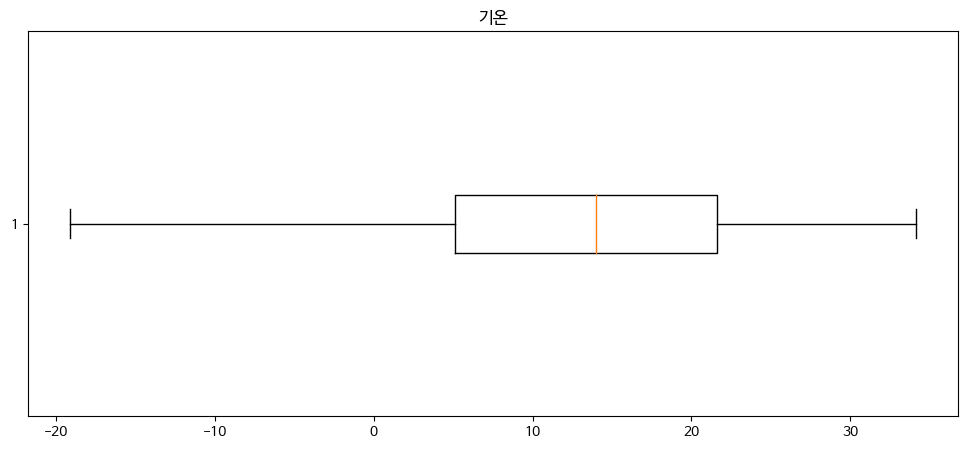

In [ ]:
plt.figure(figsize=(12,5))
plt.title("기온")
plt.boxplot(weather["평균기온(°C)"], vert=False, showfliers=True)
plt.show()

# 모델 학습 & 예측

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import *



X=weather.iloc[:,3:7]
y=weather.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 정규화

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 샘플링
sampler = SMOTE(sampling_strategy = "auto")
X_sample, y_sample = sampler.fit_resample(X_train, y_train)

#훈련
model_log = LogisticRegression()
model_log.fit(X_sample, y_sample)

y_pred = model_log.predict(X_test)

# Evaluate the model using mean squared error
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83     58113
           1       0.02      0.70      0.05       595

    accuracy                           0.71     58708
   macro avg       0.51      0.70      0.44     58708
weighted avg       0.99      0.71      0.82     58708



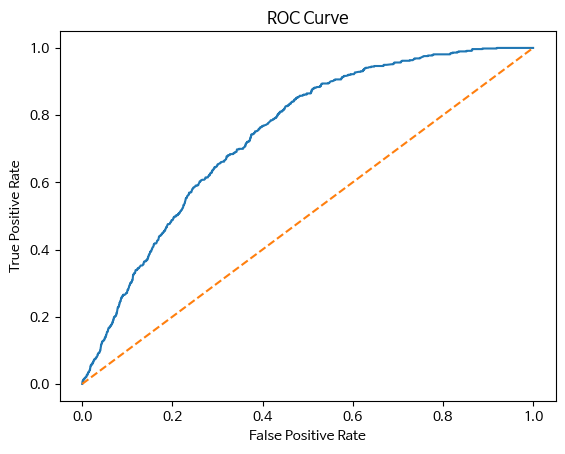

AUC: 0.496237018373505


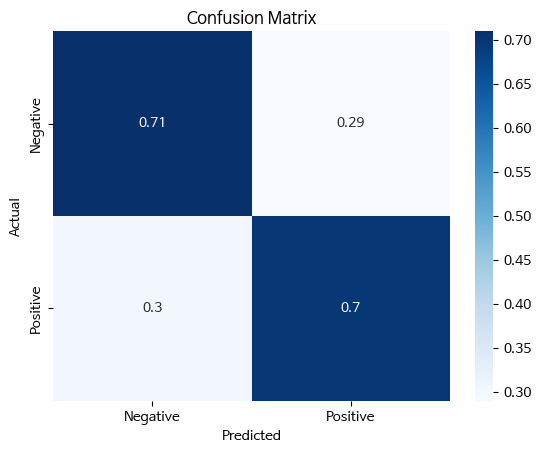

In [ ]:
# ROC 곡선을 그립니다.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # 기준선(랜덤 추측)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC(Area Under the Curve) 값을 계산합니다.

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# 혼동 행렬을 계산합니다.
cm = confusion_matrix(y_test, y_pred, normalize="true")

# 혼동 행렬을 시각화합니다.
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True,  cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.under_sampling import TomekLinks
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import ClusterCentroids
# from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler

X=weather.iloc[:,3:7]
y=weather.iloc[:,7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 정규화
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 샘플링
rus = SMOTETomek(sampling_strategy='auto')
X_sample, y_sample = rus.fit_resample(X_train, y_train)

# 훈련
model = XGBClassifier(
    learning_rate=0.01,
    n_estimators=200,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)
model.fit(X_sample, y_sample)

y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Print the mean squared error
print("Mean Squared Error:", mse)
print("accuracy_score:", accuracy)
print("f1_score:", f1)
print(report)

Mean Squared Error: 0.2964672617019827
accuracy_score: 0.7035327382980173
f1_score: 0.04656258559298822
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     58113
           1       0.02      0.71      0.05       595

    accuracy                           0.70     58708
   macro avg       0.51      0.71      0.44     58708
weighted avg       0.99      0.70      0.82     58708



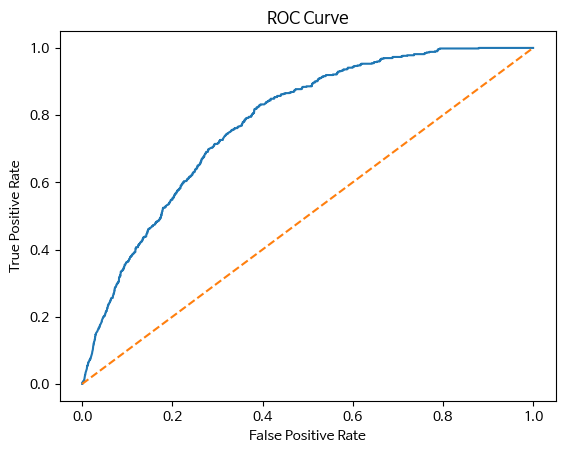

AUC: 0.7792755262241182


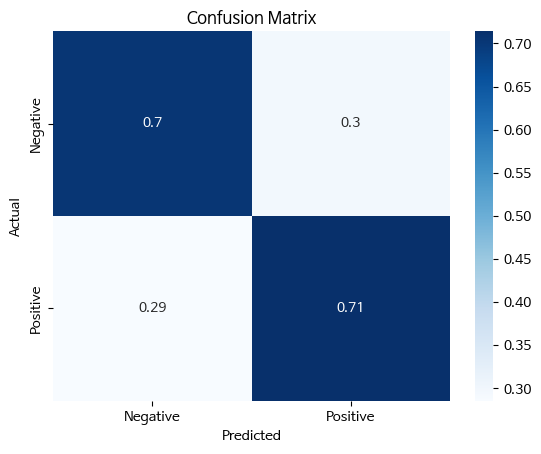

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 모델의 예측 확률을 얻습니다.
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC 곡선을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC 곡선을 그립니다.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # 기준선(랜덤 추측)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC(Area Under the Curve) 값을 계산합니다.
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# 혼동 행렬을 계산합니다.
cm = confusion_matrix(y_test, y_pred, normalize="true")

# 혼동 행렬을 시각화합니다.
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True,  cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.66      0.79     58132
           1       0.02      0.76      0.04       576

    accuracy                           0.66     58708
   macro avg       0.51      0.71      0.42     58708
weighted avg       0.99      0.66      0.78     58708



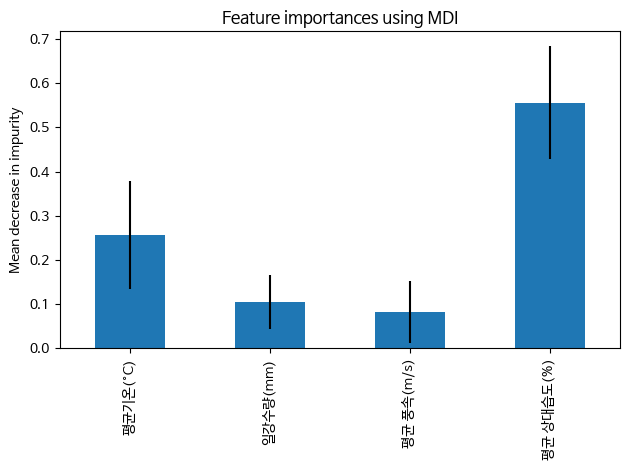

In [ ]:
#Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings(action = 'ignore')
#weather=pd.read_csv("using_weather.csv") #사용 파일 로딩
X=weather.iloc[:,3:7]
y=weather.iloc[:,7]

#under sampling 이외의 것에 대해서는 성능이 좋지 않음
#rus = RandomUnderSampler() #성능 보통 0.69  0.76
#over sampling
#rus=BorderlineSMOTE() 성능 살짝 낮음
#rus= SMOTEN(random_state=0) 성능 좋지 않음
#rus = SMOTE(sampling_strategy='minority') #성능 살짝 낮음
#over+under
rus = SMOTETomek(sampling_strategy='auto') #성능 보통


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_rus0, y_rus0 = X_test,y_test


model = RandomForestClassifier(n_estimators=200,criterion="log_loss",max_depth=2,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.3,max_features="sqrt",max_leaf_nodes=100,
                               min_impurity_decrease=0.0,bootstrap=True,oob_score=False,random_state=100,
                               verbose=0,warm_start=True,class_weight="balanced_subsample",ccp_alpha=0.0,#max_samples
                               ) #여러 하이퍼 파라미터 조작 가능, 성능은 다소 낮음 girdserach사용시 시간이 굉장히 오래 걸림, 최적 파라미터 찾는 것에 실패

model = RandomForestClassifier(min_samples_leaf=10,max_depth=2,criterion="log_loss") # 필요한 하이퍼 파라미터만 조작, 1에대한 recall이 가장 높음

model = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2, min_samples_leaf=10), n_estimators=10,learning_rate=0.5,random_state=100)  #boosting으로 0에 대한 recall값 상승,1의 recall값 하강
#score = cross_val_score(model, X, y, scoring='average_precision', cv=5)
feature_names = X.columns
model=model.fit(X_rus,y_rus)
importances = model.feature_importances_
forest_importances = pd.Series(importances,index=feature_names)
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
y_pred = model.predict(X_rus0)

print(classification_report(y_rus0, y_pred))

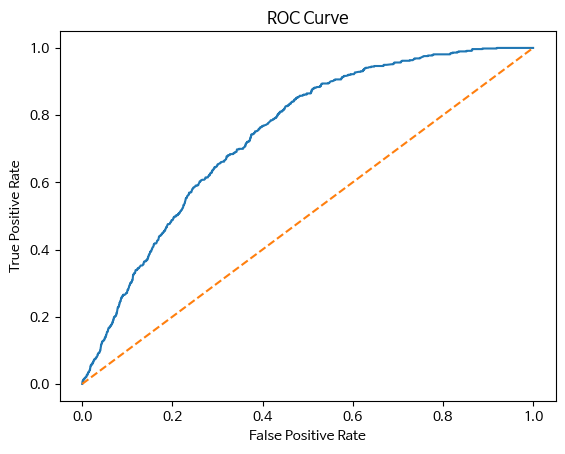

AUC: 0.7430656349868499


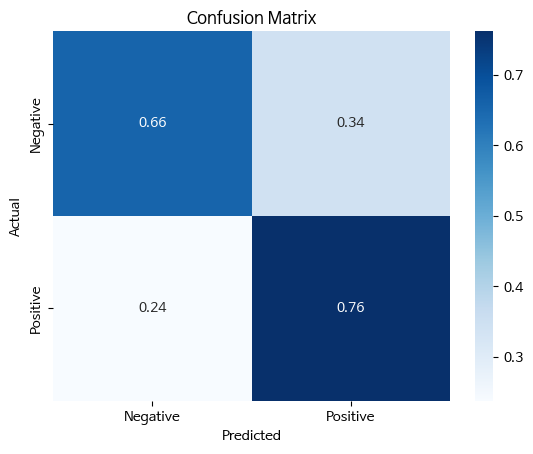

In [ ]:
# ROC 곡선을 그립니다.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # 기준선(랜덤 추측)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC(Area Under the Curve) 값을 계산합니다.

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# 혼동 행렬을 계산합니다.
cm = confusion_matrix(y_test, y_pred, normalize="true")

# 혼동 행렬을 시각화합니다.
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True,  cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()